<h1>A* Search Algorithm</h1>

A* search algorithm is among the most popular pathfinding algorithms in Computer Science. It utilizes a combination of Dijkstra's algorithm as well as heuristics to provide a best-first search algorithm.It is widely used in gaming, Artificial Inteligence and other graph traversal use cases.

Let's say we have to travel fro North-End, Boston to Manhattan, NY. We open Google Maps and enter the source and destination. Immediately, the application provides us the best possible route highlighted with a bold line

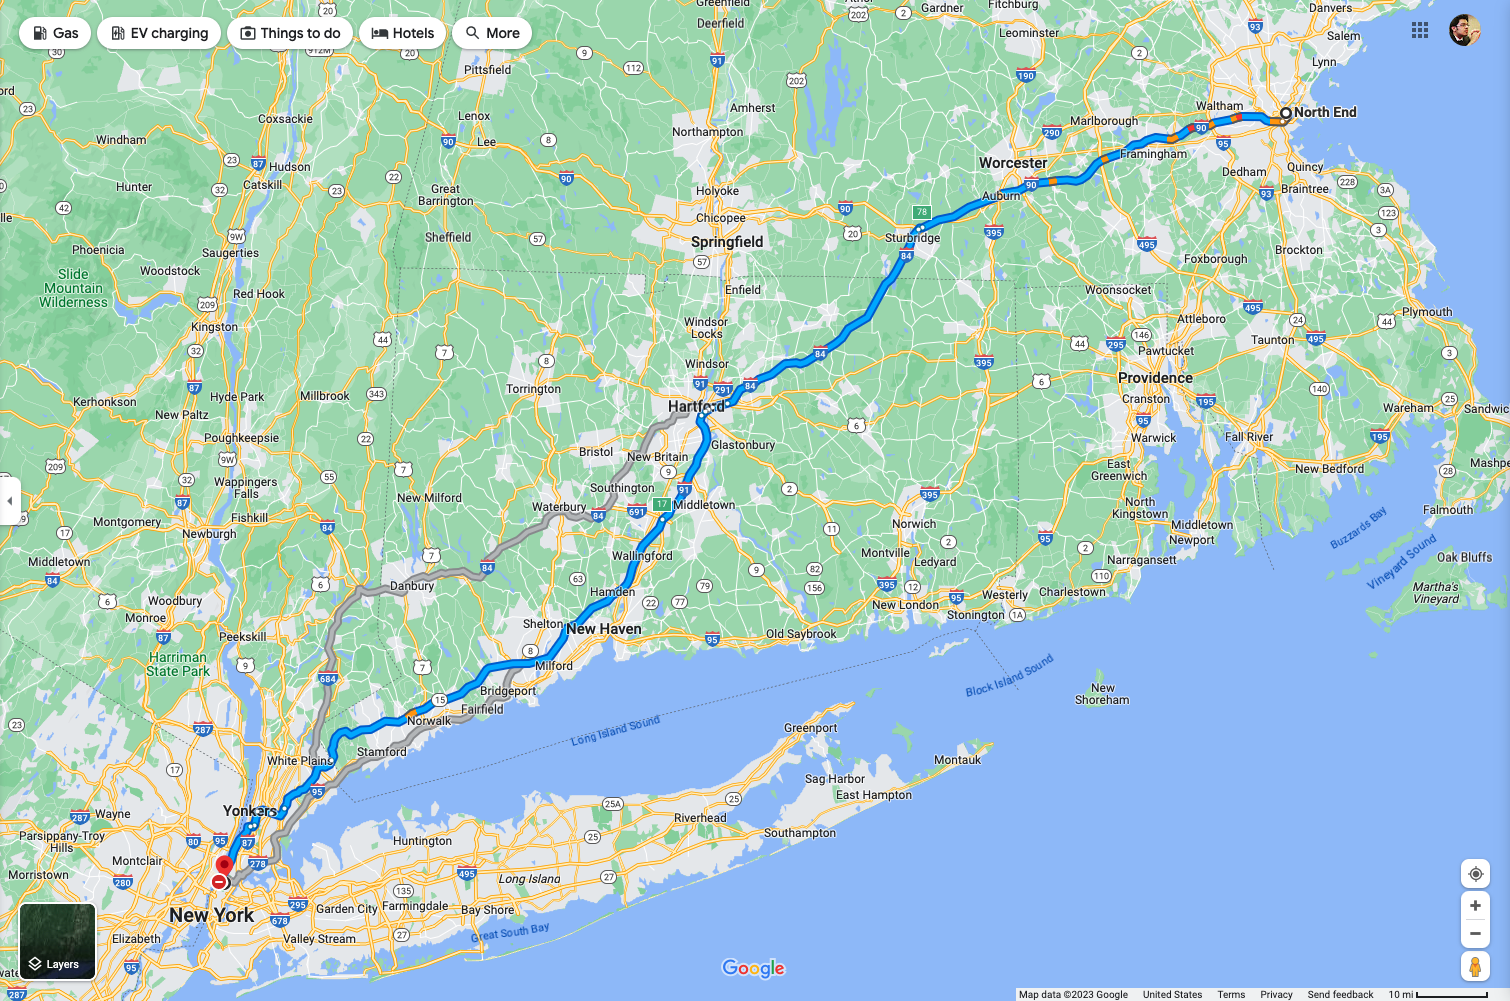

This is achieved by A* Algorithm and its optimized path-finding technique. 

<h4> How does A* Algorithm differ from Dijikstra's Algorithm? </h4>

A* (pronounced "A-star") algorithm and Dijkstra's algorithm are two popular pathfinding algorithms used in computer science to find the shortest path between two points in a graph or a network.

Here are the main differences between the two algorithms:

1. Heuristics: Heuristics, a technique for estimating the distance between the current node and the target node, are used by the A* algorithm. Dijkstra's algorithm, in contrast, simply considers the actual cost between nodes. [2]

2. Goal-directed: The Dijkstra algorithm is not goal-directed and takes into account every node in the graph, but the A* method is goal-directed and has a target node to reach. [1].

4. Optimality: As long as the heuristic function utilized is acceptable and consistent, the A* method ensures that the shortest route between the starting node and the target node will be found. On the other hand, because it takes into account every node in the graph, Dijkstra's algorithm, which also determines the shortest path, may take more time to execute [2].

4. Memory usage: The A* algorithm only keeps track of nodes that are currently on the frontier of the search, as opposed to Dijkstra's algorithm, which keeps track of all nodes in the graph, it consumes less memory.

<h4> Visual Comparision of difference between A* and Dijikstra </h4>

Below is the visual representation of difference between the running of Dijikstra's and A* Algorithm [3].


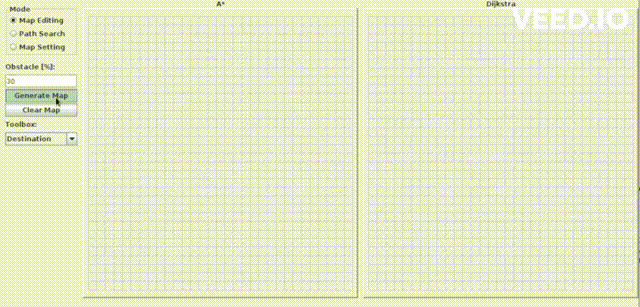

As can be seen, Dijkstra visits over six times as many nodes while still finding pathways that are almost equivalent in length. One of the key drawbacks is that because A* uses a heuristic, it is possible that Dijkstra finds a faster way, but in many cases, the comparison of how quickly it finds the path with A* is thought to be well worth it because it finds a path of comparable time in a smaller number of nodes visited.

<h4> Examples of A* algorithm </h4>

<h5>Example 1:</h5>

Let's consider the given graph below:

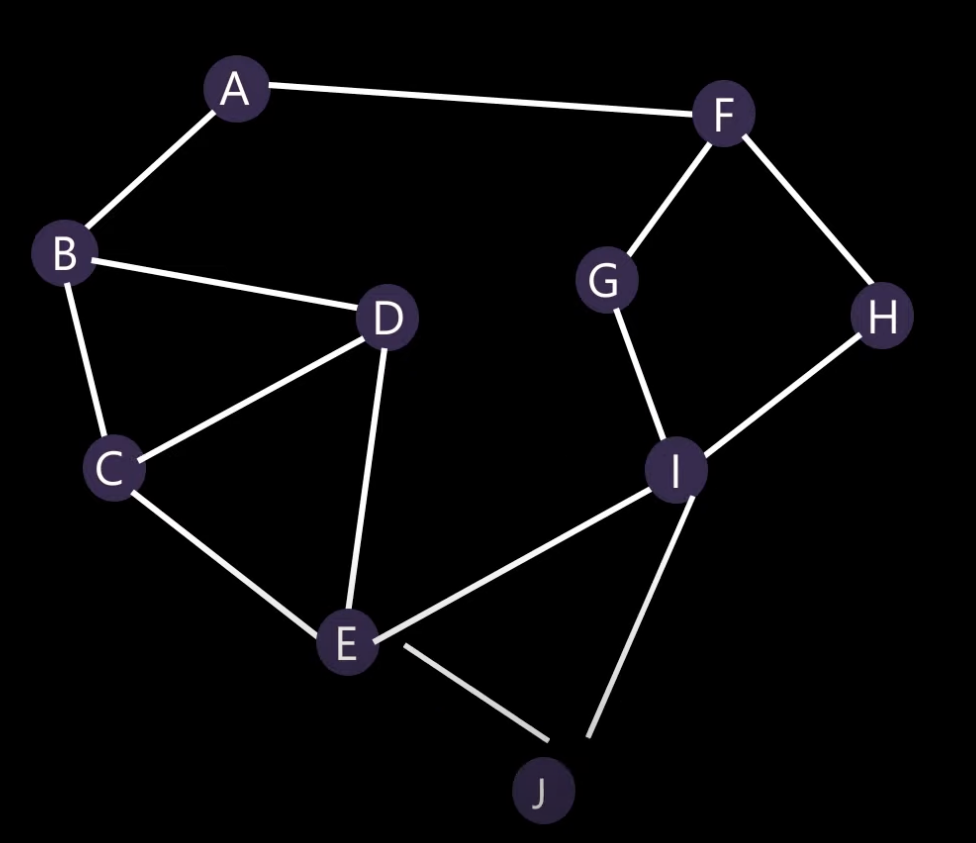

The number written in blue is the distance between the nodes and the numbers written in red is the heuristics value. 


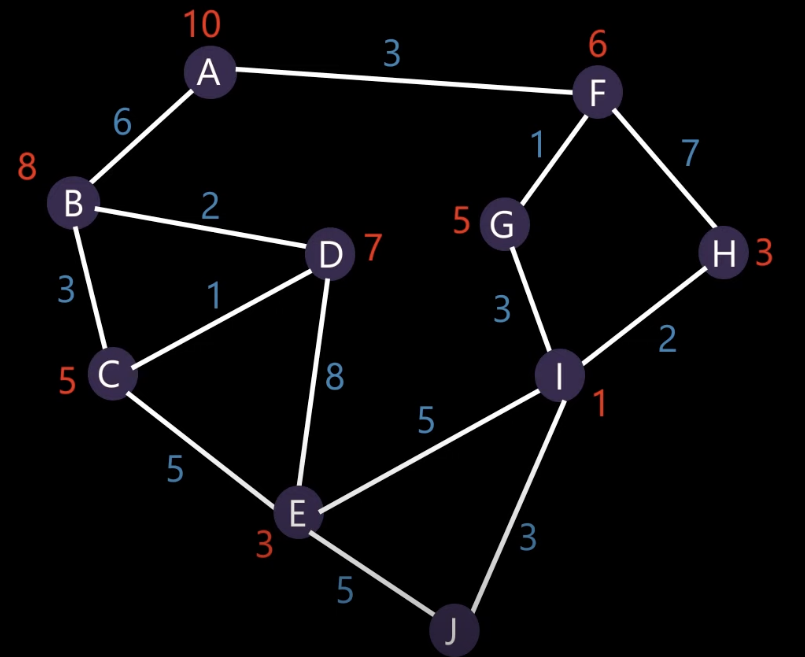

Let us start with node A, for any node X, F(X) = f(x) + g(x) where f(x) is the distance between nodes and g(x) is the heuristic distance

A has two nodes B and F, let's calculate F(B) and F(F)

Stage 1:

F(B) = 6 + 8 = 14
F(F) = 3 + 6 = 9,
F(F) < F(B) hence we travel from A to node F

Current Path: A-F

Stage 2:

F has two nodes G and H

F(G) = (3+1) + 5 = 9
F(H) = (3+7) + 3 = 13,
F(G) < F(H) hence we travel from F to node G

Current Path: A-F-G

Stage 3:

G is only connected to I

F(I) = (3+1+3) + 1 = 8

Hence we travel from G to node I

Current Path: A-F-G-I

Stage 4:

I is connected to E, J, H

F(E) = (3+1+3+5) + 3 = 15
F(H) = (3+1+3+2) + 3 = 12
F(J) = (3+1+3+3) + 0 = 10

As F(J) is the least, and J is the target node, we have reached our final destination.

Current Path: A-F-G-I-J


In [15]:
from collections import deque

class Graph:
    # example of adjacency list (or rather map)
    # adjacency_list = {
    # 'A': [('B', 1), ('C', 3), ('D', 7)],
    # 'B': [('D', 5)],
    # 'C': [('D', 12)]
    # }

    def __init__(self, adjacency_list):
        self.adjacency_list = adjacency_list

    def get_neighbors(self, v):
        return self.adjacency_list[v]

    # heuristic function with equal values for all nodes
    def h(self, n):
        H = {
            'A': 1,
            'B': 1,
            'C': 1,
            'D': 1, 
            'E': 1, 
            'F': 1, 
            'G': 1, 
            'H': 1, 
            'I': 1,
            'J': 1
            
        }

        return H[n]

    def a_star_algorithm(self, start_node, stop_node):
        # open_list is a list of nodes which have been visited, but who's neighbors
        # haven't all been inspected, starts off with the start node
        # closed_list is a list of nodes which have been visited
        # and who's neighbors have been inspected
        open_list = set([start_node])
        closed_list = set([])

        # g contains current distances from start_node to all other nodes
        # the default value (if it's not found in the map) is +infinity
        g = {}

        g[start_node] = 0

        # parents contains an adjacency map of all nodes
        parents = {}
        parents[start_node] = start_node

        while len(open_list) > 0:
            n = None

            # find a node with the lowest value of f() - evaluation function
            for v in open_list:
                if n == None or g[v] + self.h(v) < g[n] + self.h(n):
                    n = v;

            if n == None:
                print('Path does not exist!')
                return None

            # if the current node is the stop_node
            # then we begin reconstructin the path from it to the start_node
            if n == stop_node:
                reconst_path = []

                while parents[n] != n:
                    reconst_path.append(n)
                    n = parents[n]

                reconst_path.append(start_node)

                reconst_path.reverse()

                print('Path found: {}'.format(reconst_path))
                return reconst_path

            # for all neighbors of the current node do
            for (m, weight) in self.get_neighbors(n):
                # if the current node isn't in both open_list and closed_list
                # add it to open_list and note n as it's parent
                if m not in open_list and m not in closed_list:
                    open_list.add(m)
                    parents[m] = n
                    g[m] = g[n] + weight

                # otherwise, check if it's quicker to first visit n, then m
                # and if it is, update parent data and g data
                # and if the node was in the closed_list, move it to open_list
                else:
                    if g[m] > g[n] + weight:
                        g[m] = g[n] + weight
                        parents[m] = n

                        if m in closed_list:
                            closed_list.remove(m)
                            open_list.add(m)

            # remove n from the open_list, and add it to closed_list
            # because all of his neighbors were inspected
            open_list.remove(n)
            closed_list.add(n)

        print('Path does not exist!')
        return None
    

In [16]:
    adjacency_list = {
    'A': [('F', 3), ('B', 6)],
    'B': [('C', 3), ('D', 2)],
    'C': [('D', 1), ('E', 5)], 
    'D': [('E', 8)], 
    'E': [('I', 5), ('J', 5)], 
    'F': [('G', 1), ('H', 7)], 
    'G': [('I', 3)], 
    'H': [('I', 2)], 
    'I': [('E', 5), ('J', 3), ('H', 2)], 
    'J': [()]
}
graph1 = Graph(adjacency_list)
graph1.a_star_algorithm('A', 'J')


Path found: ['A', 'F', 'G', 'I', 'J']


['A', 'F', 'G', 'I', 'J']

<h5>Example 2:</h5>


<h4>References </h4>

[1] Russell, S. J., & Norvig, P. (2010). Artificial intelligence: a modern approach (3rd ed.). Prentice Hall.

[2] Cormen, T. H., Leiserson, C. E., Rivest, R. L., & Stein, C. (2009). Introduction to algorithms (3rd ed.). MIT Press.

[3] Kevin Wang. (2015, March 1). Compare A* with Dijkstra algorithm [Video]. YouTube. https://www.youtube.com/watch?v=g024lzsknDo